In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from depth_rebasing.Md import Md, normalize
import os
import pandas as pd
import pickle

In [4]:
#!pip install face_alignment

In [7]:
import face_alignment
from skimage import io
from mpl_toolkits.mplot3d import Axes3D
import collections
# Optionally set detector and some additional detector parameters
face_detector = 'sfd'
face_detector_kwargs = {
    "filter_threshold" : 0.8
}
#you can change device to 'gpu'

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cpu', flip_input=True,
                                  face_detector=face_detector, face_detector_kwargs=face_detector_kwargs)

from face_alignment_eyes import bulat_al

AttributeError: module 'face_alignment' has no attribute 'FaceAlignment'

(385, 300, 3)
385 300


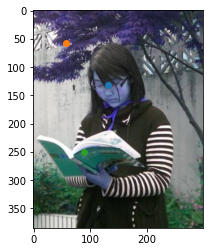

In [9]:
img= cv.imread("/Users/Admin/Documents/UPMC_ISI_2/ML/part_data/train/00000003/00003018.jpg")
print(img.shape)
plt.imshow(img)

x,y,c=img.shape
print(x,y)

# point entre les yeux bleu
xg=int(0.44*y)
yg=int(0.34416*x)
plt.scatter(xg,yg)

#target vert
xtr=int(0.30333*y)
ytr=int(0.65325*x)

# sommet gauche orange
plt.scatter(57,57)
plt.scatter(xtr,ytr)
#0.17, 0.08,,0.29091,0.20713,  0.14727,0.63984
#0.19,0.15,0.44,0.34416,0.30333,0.65325

In [7]:
# x1
x1=int(y*0.19)
print(x1)
#y1
y1=int(x*0.15)
print(y1)


57
57


In [10]:
imgg=img[y1:y1+(yg-y1)*2,x1:x1+(xg-x1)*2]

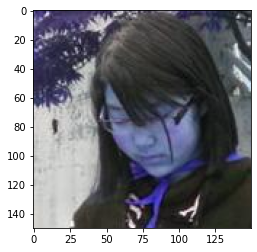

In [11]:
plt.imshow(imgg)

In [28]:
# extract head image
def extract_head(img, xi,yi,xg,yg):
    x,y= np.shape(img)[0:2] # height and width of image
    
    # point entre les yeux
    xg=int(xg*y)
    yg=int(yg*x)
    
    #point sommet gauche
    xi=int(y*xi)
    yi=int(x*yi)
    
    head=img[yi:yi+(yg-yi)*2,xi:xi+(xg-xi)*2]
    return head

def extract_target(img,xtr,ytr):
    x,y = np.shape(img)[0:2] 
    target=[int(ytr*x),int(xtr*y)]  # correspondent aux coordonnées x, sur l'image python
    return target

In [29]:
def load_images_from_folder(folder):
    images = []
    img_name = []
    for filename in os.listdir(folder):
        img = cv.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            img_name.append(folder+'/'+filename)
    return images, img_name

In [30]:
path_base_data="/Users/Admin/Documents/UPMC_ISI_2/ML/part_data/train" # database path
annot = "/Users/Admin/Documents/UPMC_ISI_2/ML/part_data/"
path_annotation="/Users/Admin/Documents/UPMC_ISI_2/ML/part_data/train_annotations.txt" #annotation path
directories=[x[0] for x in os.walk(path_base_data)] # list of different directories in database

In [37]:
# base de donnée de test pour gaze estimation --> determiner alors gx,gy,gz, 
# train data
imgs_tr=[]
imgs_heads_tr=[]
imgs_right_eye_tr=[]  # use open cv to detect the eyes
imgs_left_eye_tr=[] 
imgs_target_tr=[]
imgs_name_tr=[]


In [ ]:
# test data
# train data
imgs_ts=[]
imgs_heads_ts=[]
imgs_right_eye_ts=[]  # use open cv to detect the eyes
imgs_left_eye_ts=[] 
imgs_target_ts=[]
imgs_name_ts=[]


In [32]:
# for all images
#img=[]
#img_name=[]
#for i in directories[1:]: 
    #img, img_name =load_images_from_folder(i)
    
    #imgs_tr.append(img)
    #imgs_name_tr.append(img_name)
    
path_base_data="/Users/Admin/Documents/UPMC_ISI_2/ML/part_data/train/00000001" # test on one directory
imgs_tr,imgs_name_tr=load_images_from_folder(path_base_data)

In [33]:
# get information from the txt file

with open(path_annotation, 'r') as f:
    annotations = [[num for num in line.split(',')] for line in f]
f.close()
annotations = np.array(annotations)

In [34]:
# build the head data, get target position , extract left and right eye 
def create_data(imgs, imgs_name, imgs_heads, imgs_target, imgs_right_eye, imgs_left_eye):
    for i in range (np.size(imgs)):    
        l=0
        target=np.zeros((np.shape(imgs)[0],2))
        for k in annotations[:,0]:        
            k=annot+k
            if k==imgs_name[i]:
                img= extract_head(imgs[i],float(annotations[l,2]),float(annotations[l,3]),float(annotations[l,6]),float(annotations[l,7]) )           
                target=extract_target(imgs[i],float(annotations[l,8]),float(annotations[l,9]))   
                # eye extraction
                imEye_l,imEye_r= bulat_al(img,fa)

                imgs_heads.append(img.resize((224, 224)))
                imgs_target.append(target)
                imgs_right_eye.append(imEye_r)
                imgs_left_eye.append(imEye_l)

            l=l+1
        imgs[i]=imgs[i].resize((224, 224))
    return imgs_heads, imgs_target, imgs_right_eye, imgs_left_eye
    

In [ ]:
# create the pickle files
# train file

# test file

In [ ]:
depth_maps_tr=[] # determiner la depth map à recuperer
heat_maps_tr=[] # determiner la heatmap de chaque image de test
gz_tr=[] # information to get from gaze detection

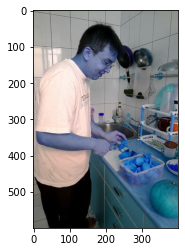

In [56]:
# build the heatmaps
for i in range (np.size(depth_maps)):    
    heat_maps=Md(depth_maps[i], imgs_heads[i], gz[i]) # on doit multiplier par le module FOV


In [ ]:
# build the dataset for classification
# x_train = imgs, heat_maps
# y_train = find maxpoint and draw a circle

In [ ]:
# à faire:
# estimer l'emplacement des yeux pr gaze_follow
# entrainer gaze360 et tester sur gaze follow , recuperer gx,gy,gz
# determiner alors les heat_maps 
# entrainer la partie 3